# EazyRL_v1.0.6 笔记

---

## 1. 绪论
> 9/6

### 强化学习 RL

- 机器学习的一个分支
- 研究智能主体在环境中如何采取行动以最大化累积奖励
- 基本思想是通过智能体（Agent）与环境（Environment）的**交互**来**学习最优策略**，使得智能体能够采取一系列**动作**以**获取最大的长期奖励**
- 目标是寻找最优策略

![](./img/1.png)

Agent 产生 action 作用于 env

env 根据 action 产生 reward 和 next_state

agent 根据 reward 和 next_state 进行更新

循环上述过程

**与监督学习对比**

监督学习：
- 样本互不相关，是独立同分布的
- 根据监督者给出的 label 确定正误
- 通过反向传播更新模型参数，实现学习

强化学习：
- 输入的是序列数据，数据之间有很强的关联
- 不给出正确的动作，需要学习器不断尝试
- 延迟奖励：奖励信号不是立即给出的，而是延迟一段时间
- 动作会影响后面的数据

深度强化学习：省去特征提取，实现端到端

### 序列决策

在与环境的交互过程中，智能体会获得很多观测

每一个观测 - 采取一个动作 - 得到一个奖励

**历史是观测 动作 奖励的序列**

智能体采取**当前动作** 依赖于 **得到的历史**

**状态是历史的函数**

基本问题：**学习与规划**

智能体能够观察环境所有状态（上帝视角） - 完全可观测的环境 - 马尔可夫决策过程 MDP

智能体只能看到部分的观测状态（有限信息） - 部分可观测的环境 - 部分可观测马尔可夫决策过程 POMDP

### 动作空间

给定环境中 有效动作的集合

- 离散动作空间：动作数量有限，如围棋
- 连续动作空间：动作是实值的向量，如智能驾驶

### 智能体组成

> 策略，价值函数，模型

#### **策略**

输入状态到动作的函数

- 随机性策略：概率分布采样
- 确定性策略：直接选择最有可能的动作（可能性最大的动作）

通常采用随机性策略，避免出现局部最优解。

#### **价值函数**

函数值是对**未来奖励**的预测

**折扣因子**

折扣因子γ（gamma） 反映了决策者对未来收益相对于当前收益的重视程度。

折扣因子越大，表示决策者越看重未来的收益；

折扣因子越小，表示决策者越倾向于即时满足，即更看重当前的收益。



![](./img/2.png)

pi策略 gamma折扣因子 r回报 s状态

**Q 函数**

包含 状态 和 动作 两个变量，未来可以获得奖励的期望取决于当前的状态和当前的动作。

![](./img/3.png)

#### **模型**

- 状态转移概率
- 奖励函数：当前状态采取某个动作可以得到的奖励（价值函数是预测）

### 智能体类型

#### **基于价值 / 基于策略**

- 基于价值：学习价值函数 （QL,Sarsa）
- 基于策略：学习策略，通过状态给出动作概率 (PG)
- 结合两者：演员（策略）- 评论员（价值）智能体

基于价值迭代的方法只能应用在不连续的、离散的环境下，而基于策略迭代的方法可以应用在连续的环境中。

#### **有模型 / 免模型**

是否需要对真实环境进行建模：

- 有模型：学习状态转移来采取动作，如状态转移和奖励函数都是**已知**的，能知道某一状态采取某一决策后的奖励和状态（动规问题）
- 免模型：学习价值函数和策略函数进行决策，没有环境转移函数和奖励函数。没有对真实环境进行建模，智能体只能在真实环境中通过一定的策略来执行动作，**等待**奖励和状态迁移，然后根据这些反馈信息来**更新**动作策略，这样反复迭代直到学习到最优策略。

有模型同时在真实环境与虚拟世界学习

免模型直接与真实环境交互来学习 一般需要大量数据样本

### 探索与利用

单步强化学习任务 - K-臂赌博机

- 仅探索：机会平均分配，最后计算期望
- 仅利用：贪心

### 实验

In [28]:
import gym
import pygame

**CartPole-v0 环境**

In [79]:
env = gym.make('CartPole-v0')
env.reset()

for _ in range(100):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info, others = env.step(action)
env.close()

动作：

In [80]:
env.action_space.sample() # 0 or 1

1

状态信息 observation

In [81]:
observation

array([4.2427716, 3.7990518, 6.626667 , 4.7200627], dtype=float32)

奖励 reward

In [82]:
reward

0.0

游戏是否完成了 done

In [83]:
done

True

调试信息 info

In [85]:
info

False

`step()` 完成了一个完整的 S-A-R-S' 迭代过程

查看 gym 库中的环境：

In [89]:
from gym import envs

specs = envs.registry.values() # 原书代码有误
ids = [spec.id for spec in specs]
ids

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1',
 'LunarLander-v2',
 'LunarLanderContinuous-v2',
 'BipedalWalker-v3',
 'BipedalWalkerHardcore-v3',
 'CarRacing-v2',
 'Blackjack-v1',
 'FrozenLake-v1',
 'FrozenLake8x8-v1',
 'CliffWalking-v0',
 'Taxi-v3',
 'Reacher-v2',
 'Reacher-v4',
 'Pusher-v2',
 'Pusher-v4',
 'InvertedPendulum-v2',
 'InvertedPendulum-v4',
 'InvertedDoublePendulum-v2',
 'InvertedDoublePendulum-v4',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'HalfCheetah-v4',
 'Hopper-v2',
 'Hopper-v3',
 'Hopper-v4',
 'Swimmer-v2',
 'Swimmer-v3',
 'Swimmer-v4',
 'Walker2d-v2',
 'Walker2d-v3',
 'Walker2d-v4',
 'Ant-v2',
 'Ant-v3',
 'Ant-v4',
 'Humanoid-v2',
 'Humanoid-v3',
 'Humanoid-v4',
 'HumanoidStandup-v2',
 'HumanoidStandup-v4']

#### 与 `gym` 库交互

示例：小车上山

In [1]:
import gym
env = gym.make('MountainCar-v0')
env

<TimeLimit<MountainCarEnv<MountainCar-v0>>>

观测空间：连续空间用 `gym.spaces.Box` 类 表示范围

In [2]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

动作空间：离散空间用 `gym.spaces.Discrete` 类 表示可取的数量，即动作数

In [3]:
env.action_space

Discrete(3)

实现智能体，控制小车移动：

In [4]:
class SimpleAgent:
    def __init__(self, env):
        pass
    def decide(self, observation):
        pos,vel = observation
        lb = min( -0.09 * (pos + 0.25) ** 2 + 0.03,
                0.3 * (pos + 0.9) ** 4 - 0.008 )
        ub = -0.07 * (pos + 0.38) ** 2 + 0.07
        if lb < vel < ub:
            return  2
        else: return 0
    def learn(self, *args):
        pass

In [5]:
agent = SimpleAgent(env)

与环境交互：

In [6]:
def play(env,agent,render=False,train=False):
    episode_reward = 0 # 回合总奖励
    observation = env.reset() 
    while True:
        if render:
            env.render()
        action = agent.decide(observation)
        next_obs,reward,done,_ = env.step(action) 
        episode_reward += reward
        if train:
            agent.learn(observation,action,reward,done)
        if done:
            break
        observation = next_obs
    return episode_reward

交互一回合：
> !TODO notebook 中无法显示 gym 窗口

In [7]:
env.seed(7) # 随机种子 v0.26 已经去掉了这个方法
episode_reward= play(env,agent)
episode_reward

-105.0

评估智能体的性能，需要计算出连续交互 100 回合的平均回合奖励：

In [8]:
episode_rewards = [ play(env,agent) for _ in range(100) ]
import numpy as np
np.mean(episode_rewards)

-106.13

#### **总结**

In [ ]:
env = gym.make('') # 取环境
obs = env.reset()  # 初始化环境
action = 1         # 随机动作
next_obs,reward,done,info = env.step(action)   # 执行动作

**习题**

**1. 强化学习基本结构？**

agent, environment, reward, value function, policy/action

**2. 比监督学习训练过程困难的原因**

延迟奖励

**3. 基本特征**

exploration, exploitation

**5. 状态和观测？**

状态：客观世界中事物的属性，是事物内部特征的集合，是全集

观测：是状态的一种表现，是外界对状态的一种观察，是子集

**6. 智能体组成**

policy, value function, model

**7. 分类？**

policy_based, value_based

model_free, model_based


**8. 基于策略迭代和基于价值迭代的强化学习方法有什么区别**

策略：通过策略给出概率，连续的环境

价值：学习价值函数，离散的环境

**9. 有模型学习和免模型学习有什么区别**

有：奖励函数 / 价值函数 都是明确的，可以建立清晰的模型

无：现实情况，无需模型。通过智能体与环境的交互来学习。需要较大的数据样本量

**10. 强化学习？**

通过智能体与环境的不断交互，优化调整策略，以期达到最优奖励

输入是一串序列，样本之间具有相关性

---

## 2. 马尔可夫决策过程

> 9/7

智能体与环境的交互过程 可以用 马尔可夫决策过程 表示，马尔可夫决策过程是强化学习的基本框架

在马尔可夫决策过程中，它的环境是**全部可观测**的。

但是很多时候环境里面有些量是不可观测的，但是这个部分观测的问题也可以转换成马尔可夫决策过程的问题

### 马尔可夫过程 MP

#### **马尔可夫性质**

随机过程 在某一时刻的状态 只与它前一个时刻的状态有关，而与它之前所有状态都无关的性质

即 **未来的转移与过去的是独立的，无记忆性**

#### **马尔可夫链**

马尔可夫过程：一组具有马尔可夫性质的随机变量序列

马尔可夫链：离散时间的马尔可夫过程，状态是有限的

使用状态转移矩阵来描述状态转移

`a[i][j]` 表示 状态 `si` 到 状态 `sj` 的转移概率

![](./img/4.png)

### 马尔可夫奖励过程 MRP

马尔可夫链 + 奖励函数

#### **回报和价值函数**

**回报 return** 时刻t的回报是当前获得的所有奖励的和 (单个轨迹)

**折扣回报 discounted return** 具有折扣因子的回报函数，折扣因子作为超参数，可以调整出不同偏好（长短期收益）下的 agent

**价值函数** 状态价值函数：在某状态下，agent能获得的回报期望 v(pi,s) （所有轨迹计算后的期望）

#### **贝尔曼方程**

> [推导](https://www.bilibili.com/video/BV1sd4y167NS?p=6)

简单地说就是： 状态价值 = 即时奖励 + 未来奖励的折扣和， state value = immediate reward + sum( discount factor * next state value )

![](./img/5.png)

展开来看，对于指定的策略，每个状态下的价值函数：

![](./img/bellmaneq.png)

多个状态的价值函数联立，就能得到状态转移概率矩阵：

![](./img/6.png)

#### **计算状态价值**

数学的方法需要求矩阵的逆，对于大型矩阵比较困难。可以通过迭代方法来求解。

- 动态规划 bootstrapping方法
- 蒙特卡洛
- 时序差分学习

### 马尔可夫决策过程 

在奖励过程上添加了决策条件

![](./img/7.png)

在马尔可夫决策过程中，动作是由智能体决定的，智能体会采取动作来决定未来的状态转移

#### **Q 函数 （动作价值函数）**

即添加了 决策条件 后的状态价值函数，通过某一状态下采取某一动作，得出回报的期望

![](./img/8.png)

该状态下 每个决策的Q函数值 的加权平均就是 该状态的状态价值函数

对于 Q 函数的贝尔曼方程同理，只是增加了策略条件。整理得到的就是Q函数的**贝尔曼期望方程**：

![](./img/9.png)

即： 当前价值 = 期望(即时奖励 + 折扣 * 未来价值)

对于某一个状态，它的当前价值是与它的未来价值线性相关的

当前价值 = 即时奖励 + 折扣因子 * 未来价值

#### **预测和控制**

预测 就是评估决策的价值

控制 就是搜索最优决策

预测和控制是马尔可夫决策过程的两个重要方面


可以通过策略迭代和价值迭代来解决马尔可夫决策过程的控制问题

#### **策略迭代**

包括：

- **策略评估** 根据当前策略估算价值函数
- **策略改进** 得到价值函数后 推算其Q函数，做贪心搜索

两个步骤迭代进行，直到收敛。

#### **价值迭代**

多次迭代贝尔曼最优方程，直到价值函数收敛

迭代算法过程：
1. 初始化，所有状态的价值都设0
2. 重复以下操作，直到所有状态的价值不再变化
   - 计算每个状态下每个动作的Q值
   - 利用Q值更新状态价值和动作条件（选取最大项）
3. 收敛后，提取最优策略

### 总结

**1. 折扣因子作用**

超参数 调节智能体远视/近视 视野 避免无穷奖励

**2. 解析解难求得**

需要计算状态转移概率矩阵的逆 大型矩阵的逆很难求得

**3. 贝尔曼方程求解**

蒙特卡洛 动态规划 时序差分

**4. 奖励过程与决策过程的区别**

奖励过程只根据奖励信号来调整行为，而决策过程通过 agent 的介入具有了决策的自主性，agent 可以根据环境的变化做出相应的调整。

**6. 寻找最优策略？**

策略迭代 / 价值迭代

---

## 3. 表格型方法

> 9/8

就是查表

- 蒙特卡洛
- Q-learning
- Sarsa

状态、动作、状态转移概率和奖励 `(S、A、P 、R)`，这 4 个合集就构成了强化学习马尔可夫决策过程的四元组，后面也可能会再加上折扣因子构成五元组

强化学习用价值函数 `V (S)` 来表示状态是好的还是坏的，

用 Q 函数来判断在什么状态下采取什么动作能够取得最大奖励，即用Q 函数来表示状态-动作值

### 免模型预测

在无法获取环境模型的情况下，通过 **蒙特卡洛方法** 和 **时序差分方法** 估计某个策略的价值。

#### **蒙特卡洛策略评估**

采样大量轨迹、计算所有轨迹的真实回报、计算平均值

局限性：只能用于 **有终止** 的马尔可夫决策过程

**增量式蒙特卡洛方法**

获得 新的轨迹 后

将原本蒙特卡洛的经验均值转换成增量均值

用上一时刻的值和当前时刻的增量 更新现在的值

![](./img/10.png)

- $\alpha$ 是一个超参数，用来控制更新速度
- $G_t$ 代表当前时刻的回报，如 $G_t = r_{t+1} + \gamma r_{t+2} + \gamma ^2 r_{t+3} + ...$

> 增量式蒙特卡洛方法只需要一条轨迹就能更新轨迹上的所有状态

#### **时序差分**

状态价值迭代：下一个状态会影响上一个状态（例子：巴普洛夫的狗、多级条件反射）

- 免模型的
- 可以从不完整的回合中学习
- 结合了自举的思想

对于给定的策略 $\pi$ ,一步一步地计算价值函数 $v_{\pi}$ 

**一步时序差分 TD(0)**

每往前走一步，就做一步自举，更新上一步的值：

![](./img/11.png)

### 免模型控制

**$\epsilon -greedy$ 探索**

有 $1-\epsilon$ 概率按照Q函数来决定动作（取最大值）

一般取 $\epsilon = 0.1$ 在实现上会让 $\epsilon$ 随时间递减

> 最初的时候不知道那个动作较好，引入随机性实现探索；随着探索次数增加，随机性减小，就减少探索，选择最优动作

#### **Sarsa 同策略时序差分控制**

使用时序差分方法 估计 Q函数 (把时序的 V 改成 Q函数)

![](./img/12.png)

State Action Reward State' Action' SARSA

代码实现：
- 根据 Q 表格选择动作 （$\epsilon-greedy$ 策略）


In [3]:
import numpy as np

def get_action(action_space, epsilon, pi, Q, s):
    if np.random.rand() < epsilon: # explore
        return np.random.choice(action_space,p=pi)
    else : #  exploit
        return np.nanargmax( Q[s,:] )

- 获取 $s_t,a_t,r_{t+1},s_{t+1},a_{t+1}$ 更新 Q 表格

In [2]:
def sarsa(s,a,r,s_next,a_next,alpha,gamma,Q):
    if s_next == 'terminal': # 结束状态
        Q[s,a] = Q[s,a] + alpha * (r-Q[s,a])
    else :
        Q[s,a] = Q[s,a] + alpha * (r + gamma*Q[s_next,a_next]-Q[s,a]) # 时序差分

Sarsa 优化的是其实际执行的策略，而 Q-learning 优化的是其估计的策略。

#### **Q学习 异策略时序差分控制**

Q 学习的下一个动作都是通过 argmax 函数来选择的

![](./img/13.png)

二者的更新公式是一样的，区别在于 Q 学习采取的动作是 argmax 选择的动作，Q 学习只需要接收 当前状态 s 和 动作 a 的 Q 值，然后根据 Q 值选择动作即可。

迭代函数：

In [4]:
def q_learning(s,a,r,s_next,gamma,alpha,Q):
    Q[s,a] = Q[s,a] + alpha*(r + gamma*Q[s_next, np.nanargmax(Q[s_next,:]) ] - Q[s,a]) # 不考虑终点状态

Q 学习不需要知道 a_next，其探索更加大胆

### Q 学习解决悬崖寻路问题

> 9/11

**环境：`CliffWalking-v0`**

- 每走一步 收到 -1 奖励
- 掉入悬崖 返回起点并收到 -100 奖励
- 超出边界 不会移动 但会收到 -1 奖励
- 目标是以最少的步数到达终点

![](./img/14.png)

优化环境：

In [85]:
import gym
import turtle
import numpy as np

# turtle tutorial : https://docs.python.org/3.3/library/turtle.html

class CliffWalkingWapper(gym.Wrapper):
    def __init__(self, env):
        gym.Wrapper.__init__(self, env)
        self.t = None
        self.unit = 50
        self.max_x = 12
        self.max_y = 4

    def draw_x_line(self, y, x0, x1, color='gray'):
        assert x1 > x0
        self.t.color(color)
        self.t.setheading(0)
        self.t.up()
        self.t.goto(x0, y)
        self.t.down()
        self.t.forward(x1 - x0)

    def draw_y_line(self, x, y0, y1, color='gray'):
        assert y1 > y0
        self.t.color(color)
        self.t.setheading(90)
        self.t.up()
        self.t.goto(x, y0)
        self.t.down()
        self.t.forward(y1 - y0)

    def draw_box(self, x, y, fillcolor='', line_color='gray'):
        self.t.up()
        self.t.goto(x * self.unit, y * self.unit)
        self.t.color(line_color)
        self.t.fillcolor(fillcolor)
        self.t.setheading(90)
        self.t.down()
        self.t.begin_fill()
        for i in range(4):
            self.t.forward(self.unit)
            self.t.right(90)
        self.t.end_fill()

    def move_player(self, x, y):
        self.t.up()
        self.t.setheading(90)
        self.t.fillcolor('red')
        self.t.goto((x + 0.5) * self.unit, (y + 0.5) * self.unit)

    def render(self):
        if self.t == None:
            self.t = turtle.Turtle()
            self.wn = turtle.Screen()
            self.wn.setup(self.unit * self.max_x + 100,
                          self.unit * self.max_y + 100)
            self.wn.setworldcoordinates(0, 0, self.unit * self.max_x,
                                        self.unit * self.max_y)
            self.t.shape('circle')
            self.t.width(2)
            self.t.speed(0)
            self.t.color('gray')
            for _ in range(2):
                self.t.forward(self.max_x * self.unit)
                self.t.left(90)
                self.t.forward(self.max_y * self.unit)
                self.t.left(90)
            for i in range(1, self.max_y):
                self.draw_x_line(
                    y=i * self.unit, x0=0, x1=self.max_x * self.unit)
            for i in range(1, self.max_x):
                self.draw_y_line(
                    x=i * self.unit, y0=0, y1=self.max_y * self.unit)

            for i in range(1, self.max_x - 1):
                self.draw_box(i, 0, 'black')
            self.draw_box(self.max_x - 1, 0, 'yellow')
            self.t.shape('turtle')

        x_pos = self.s % self.max_x
        y_pos = self.max_y - 1 - int(self.s / self.max_x)
        self.move_player(x_pos, y_pos)

In [134]:
import gym

env_name = 'CliffWalking-v0'
env = gym.make(env_name)
env = CliffWalkingWapper(env)
env.seed(1)

num_states = env.observation_space.n
num_actions = env.action_space.n

num_states, num_actions

(48, 4)

In [87]:
s = env.observation_space.sample()
a = env.action_space.sample()

s,a

(1, 0)

环境初始化状态：

In [88]:
s = env.reset()
s

36

#### **强化学习基本过程**

1. 初始化 agent env
2. agent.get_action(state)
3. 执行 action , 返回 reward, new_state, done
4. 学习，即进行策略更新
5. 循环 2-4 直到算法收敛

**如何确定算法收敛：滑动平均奖励**

滑动平均量 反映了奖励变化的趋势：

In [22]:
import torch
x = torch.arange(1000, dtype=torch.float32)
x += 1
y = 1 / x
y = y.tolist()
ma = []
for i in y:
    if ma:
        ma.append(ma[-1]*0.9+i*0.1)
    else :
        ma.append(i)
ma

[1.0,
 0.9500000000000001,
 0.8883333343267442,
 0.8245000008940698,
 0.7620500011026861,
 0.7025116681557896,
 0.6465462162645461,
 0.5943915946380914,
 0.5460635463681776,
 0.5014571918803714,
 0.4604023820541736,
 0.4226954774304423,
 0.3881182376662666,
 0.35644927136180765,
 0.3274710112399873,
 0.30097391011598856,
 0.2767588720674796,
 0.2546385404576793,
 0.23443784434586182,
 0.21599405998578144,
 0.19915655883780545,
 0.18378635763494455,
 0.16975554803939122,
 0.15694666002629512,
 0.14525199393425864,
 0.13457294853026702,
 0.12481935740853876,
 0.11590885039876876,
 0.10776624120811502,
 0.10032295059448373,
 0.09351646189051174,
 0.08728981570146058,
 0.08159113725192763,
 0.07637320000827984,
 0.07159302288056024,
 0.06721149839097806,
 0.06319305132002725,
 0.05950532515499974,
 0.05611889523703443,
 0.05300700575058389,
 0.05014532947490866,
 0.047511748952718875,
 0.04508615544413236,
 0.042850267240178944,
 0.04078746279219302,
 0.03888262959694427,
 0.03712202614434

#### **Q学习算法实现**

智能体在训练中只做两件事：
- 选择动作
- 更新策略

In [100]:
import numpy as np

class Agent:
    def __init__(self, env, cfg):
        self.env = env
        self.state_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.Q = np.random.rand(self.state_size, self.action_size)
        self.gamma = cfg.gamma
        self.alpha = cfg.alpha
        self.epsilon_min = cfg.epsilon_min
        self.epsilon_max = cfg.epsilon_max
        self.epsilon = cfg.epsilon
        self.sample_count = 0
        self.epsilon_decay = cfg.epsilon_decay


    def choose_action(self, state):
        self.sample_count += 1
        self.epsilon = self.epsilon_min + (self.epsilon_max - self.epsilon_min) * np.exp(-1. * self.sample_count / self.epsilon_decay) # decrease epsilon
        # epsilon-greedy strategy
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            return np.argmax(self.Q[state, :])
        
    def qlearn(self, state, action, reward, next_state, done):
        q_now = self.Q[state, action]
        if done:
            q_next = reward
        else:
            q_next = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[state, action] += self.alpha * (q_next - q_now)

        

In [101]:
class Config:
    def __init__(self):
        self.seed = 1 # 随机种子
        self.epsilon = 0.95 #  e-greedy策略中epsilon的初始值
        self.epsilon_max = 0.95 #  e-greedy策略中epsilon的初始值
        self.epsilon_min = 0.01 #  e-greedy策略中epsilon的最终值
        self.epsilon_decay = 300 #  e-greedy策略中epsilon的衰减率
        self.gamma = 0.9 # 折扣因子
        self.alpha = 0.1 # 学习率

cfg = Config()



In [143]:
agent = Agent(env,cfg)

#### **训练**

In [144]:
episode = 400
rewards = []
ma_rewards = []
for i in range(episode):
    ep_reward = 0
    state = env.reset()
    while True:
        action = agent.choose_action(state)
        next_state,reward,done,_ = env.step(action)
        agent.qlearn(state,action,reward,next_state,done)
        state = next_state
        ep_reward += reward
        if done:
            break
    rewards.append(ep_reward)
    if ma_rewards:
        ma_rewards.append(ma_rewards[-1]*0.9+ep_reward*0.1)
    else :
        ma_rewards.append(ep_reward)
    print("Episode: {}, reward: {}, epsilon: {}, ma: {}".format(i,ep_reward,agent.epsilon,ma_rewards[-1]))

Episode: 0, reward: -3386, epsilon: 0.17888418913003543, ma: -3386
Episode: 1, reward: -206, epsilon: 0.1282199109253413, ma: -3068.0
Episode: 2, reward: -377, epsilon: 0.07509709179078522, ma: -2798.9
Episode: 3, reward: -113, epsilon: 0.05466602781795325, ma: -2530.3100000000004
Episode: 4, reward: -157, epsilon: 0.036466502459482096, ma: -2292.9790000000003
Episode: 5, reward: -255, epsilon: 0.025734879545065793, ma: -2089.1811000000002
Episode: 6, reward: -316, epsilon: 0.017633500658128767, ma: -1911.86299
Episode: 7, reward: -339, epsilon: 0.012465874575496746, ma: -1754.5766910000002
Episode: 8, reward: -79, epsilon: 0.011894989331299403, ma: -1587.0190219000003
Episode: 9, reward: -203, epsilon: 0.010963239247691907, ma: -1448.6171197100002
Episode: 10, reward: -301, epsilon: 0.010491257528167241, ma: -1333.8554077390002
Episode: 11, reward: -183, epsilon: 0.01026692520486906, ma: -1218.7698669651002
Episode: 12, reward: -202, epsilon: 0.010136133381881726, ma: -1117.0928802685

In [111]:
agent.Q

array([[-6.81727263e+00, -6.82303976e+00, -6.84089944e+00,
        -6.83580475e+00],
       [-6.67696820e+00, -6.64951068e+00, -6.68688604e+00,
        -6.65207030e+00],
       [-6.41489390e+00, -6.41361422e+00, -6.43292449e+00,
        -6.42680430e+00],
       [-6.15451645e+00, -6.13697066e+00, -6.16192968e+00,
        -6.15802587e+00],
       [-5.83962153e+00, -5.82556983e+00, -5.82538417e+00,
        -5.86570196e+00],
       [-5.47772527e+00, -5.48240972e+00, -5.47904396e+00,
        -5.48963860e+00],
       [-5.08144824e+00, -5.08498776e+00, -5.11963128e+00,
        -5.15465335e+00],
       [-4.69958578e+00, -4.66589370e+00, -4.65973157e+00,
        -4.69612964e+00],
       [-4.19172998e+00, -4.20218981e+00, -4.21274136e+00,
        -4.23822864e+00],
       [-3.71162809e+00, -3.70573302e+00, -3.69913480e+00,
        -3.72432403e+00],
       [-3.21000421e+00, -3.16447482e+00, -3.17091674e+00,
        -3.23551514e+00],
       [-2.65362525e+00, -2.65688320e+00, -2.62482864e+00,
      

查看路径：

In [145]:
action_lang=["up","right","down","left"]
print(36,action_lang[np.argmax(agent.Q[36,:])])
for i in range(25,36):
    print(i,action_lang[np.argmax(agent.Q[i,:])])

36 up
25 right
26 right
27 right
28 right
29 right
30 right
31 right
32 right
33 right
34 right
35 down


### 习题

**1. 构成马尔可夫决策过程的四元组**

$(state,action,reward,P)$

**2. 学习**

exploration & exploitation

**3. Sarsa 学习过程**

$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1},a_{t+1} - Q(s,a)) )$

**4. QLearning 与 Sarsa 区别**

QL：异策略，大胆探索，不需要知道下一步的策略（直接贪心）
Sa：同策略，保守探索，需要知道下一步的策略

一般来说 Sarsa 显得更加保守和安全，而 QLearning 更能找到最佳策略。

---

## 4. 策略梯度

> 9/12

### 策略梯度算法

强化学习具有三个组成部分：
- 演员 actor
- 环境 env
- 奖励函数 reward

环境 与 奖励函数 都不是我们可以控制的

#### 策略函数


**策略** 一般记作 $\pi$，在基于模型的学习中 策略是一个函数

若是采用深度学习方法来做强化学习，策略就是一个网络，网络的参数记作 $\theta$

**例如：**

给网络输入一个游戏画面；输出是可以执行的动作的概率

有三个动作就有三个输出神经元

经过 softmax 操作后就得到了概率分布

#### 轨迹

**轨迹** 就是一个回合内环境输出的状态s和演员输出的动作a的组合

$\tau = \{ s_1,a_1,s_2,a_2...,s_t,a_t \}$

根据给定的参数 $\theta$ 可以计算某个轨迹的发生概率：

$p_\theta(\tau) = p(s_1)p_\theta(a_1|s_1)p(s_2|s_1,a_1)p_\theta(a_2|s_2)...$

即：

![](./img/15.png)

在这个式子中：

$p(s_t+1|s_t,a_t)$ 涉及到状态转移，因此是环境决定的

$p_\theta(a_t|s_t)$ 是可以控制的，即：**给定参数 $\theta$,在 $s_t$ 条件下选择 $a_t$ 的概率**

#### 奖励函数

奖励函数：$reward_t = r(s_t,a_t)$

将一条轨迹上所有s-a的奖励加起来，就是轨迹的回报：$R(\tau)$

**学习的目的就是通过调整 $\theta$，使 $R(\tau)$ 的值取到最大**

$R(\tau)$ 是一个随机变量，其所有轨迹的概率加权和就是期望奖励

$R_\theta=\sum R(\tau)p_\theta(\tau)$

使用 **梯度上升** 最大化期望奖励

#### 梯度

实际期望值难以计算，利用蒙特卡洛思想 采用采样的方式：

**采样 N 个轨迹并计算得到的回报，加起来就得到了梯度**

![](./img/16.png)

n 指第n回合，t 指第t时间步

#### 更新参数

- 采样，得到轨迹
- 代入轨迹，得到梯度
- 通过梯度来更新参数 $\theta$ : $\theta \leftarrow \theta + \eta \nabla R_\theta$

其中，$\eta$ 是学习率

更新一遍后，重新采样数据再更新模型，一次采样只使用一次（一次采样多个回合）

#### 目标函数

可以认为强化学习是一个分类问题

一般分类问题 目标函数写成最小化交叉熵，即最大化:

![](./img/17.png)

在强化学习中，还要在前面乘一个权重 轨迹回报 $R(\tau)$

![](./img/18.png)

### 实现技巧

- 添加基线
- 分配合适的分数

#### **添加基线**

**问题：**

理想情况下，目标函数的值来自于对大量轨迹采样的期望值；然而现实情况下的采样只是一小部分。

如果没有采样到动作a，即使a是一个不错的动作，它也会被忽略（改率降低）。

**解决：**

对 $R(\tau)$ 添加一条基线，选取某个奖励值 $b$，在计算 $\nabla R_\theta$ 时，将所有奖励值都减去 $b$。得到 **相对优势**

即：![](./img/19.png)

这样使得权重值有正有负，从而使得梯度下降方向更加合理。

$b$ 通常是由一个网络 (评论员网络) 估计出来的，$R-b$ 称为 **优势函数**

$A^\theta (s_t,a_t) = R-b$

#### **分配合适分数**

**问题：**

我们需要的是评价某个状态下的策略的好坏，然而根据轨迹的回报来计算是不公正的：

<u>一条好的轨迹不代表其中的动作都是好的；而一条坏的轨迹却可能包含很多好的动作。</u>

**解决：**

在计算某个 s-a 的奖励时，不把整个轨迹的回报代入，而是计算这个动作执行之后得到的的所有奖励

并且引入折扣因子 $\gamma$ 用于调整对长短期收益的关注程度： $r_{a_t}=r_1 + \gamma  r_2 + \gamma ^2  r_3 + ...$

### REINFORCE 蒙特卡洛策略梯度

- 蒙特卡洛方法：使用采样到的某个s-a的回报期望来近似其策略q值：$q_\pi(s_t,a_t) = q_t(s_t,a_t) = r_t + \gamma  r_{t+1} + \gamma ^2  r_{t+2} + ...$
- 策略梯度算法：使用 $\pi (\theta)$ 策略函数代替 Q 表格，利用梯度更新参数：$\theta \leftarrow \theta + \alpha  \nabla_\theta J(\pi)$

#### 策略模型

使用深度神经网络作为策略模型 $\pi_\theta (s_t,a_t)$ 输入状态 $s_t,a_t$ 输出动作概率 $p_\theta(a | s_t)$

在神经网络中：

- 输入层：状态 $s_t$， `num_inputs = num_states`
- 隐藏层：神经元
- 输出层：动作概率 $p_\theta(a | s_t)$ `num_outputs = num_actions`

最后，还需要加上一层 softmax 层，将输出转换为概率分布。

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

class PolicyNet(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=128,lr = 1e-3):
        super(PolicyNet, self).__init__()
        self.num_actions = action_size
        self.num_states = state_size
        self.lr = lr
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.CrossEntropyLoss()
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x


#### 智能体

- 选择动作：概率采样
- 计算收益：
$$
G_t=\sum_{k=0}^\infty \gamma^kR_{t+k+1}
$$
- 更新参数：策略梯度算法

In [4]:
import numpy as np
from torch import autograd

class Agent:
    def __init__(self, env, cfg):
        self.gamma = cfg.gamma
        self.name = cfg.name
        self.env = env
        self.state_size = cfg.state_size
        self.action_size = cfg.action_size
        self.net = PolicyNet(self.state_size, self.action_size,lr=cfg.lr)

    def choose_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        # 使用网络得到概率分布
        # print(">>> ",type(state),state.size())
        probs = self.net(state)
        # 预测时不参与计算梯度
        choice = np.random.choice(self.action_size, p=probs[0].detach().numpy())
        # 对数化
        log_prob = torch.log(probs.squeeze(0)[choice])
        return choice, log_prob
    
    def get_action(self, state): # for test
        state = torch.from_numpy(state).float().unsqueeze(0)
        return np.argmax(self.net(state)[0].detach().numpy())
    
    def discount_rewards(self, rewards):
        discounted_rewards = []
        # 计算每条轨迹的折扣奖励
        for t in range(len(rewards)):
            Gt = 0
            pw = 0
            for reward in rewards[t:]:
                Gt += reward * (self.gamma ** pw)
                pw += 1
            discounted_rewards.append(Gt)
        return discounted_rewards
    
    def update_policy(self, log_probs, rewards):
        discounted_rewards = self.discount_rewards(rewards)
        discounted_rewards = torch.tensor(discounted_rewards,dtype=torch.float)
        # 对回报作归一化
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)
        # 计算梯度
        policy_grad = []
        for log_prob, discounted_reward in zip(log_probs, discounted_rewards):
            policy_grad.append(-discounted_reward * log_prob)
        # 优化
        self.net.optimizer.zero_grad()
        pg = torch.stack(policy_grad).sum()
        pg.backward()
        self.net.optimizer.step()


#### 环境

**`CarPole-v0` 环境：**

控制一个小车向左或向右移动，目的是使小车上的摆件保持在竖直位置上。每一步使得摆件竖直都会得到 1 单位奖励。

动作空间：0，1 表示向左和向右

观察空间：一个四维连续空间，包含小车位置、速度和摆件角度、角速度

In [5]:
import gym

env_name = 'CartPole-v0'
env = gym.make(env_name)

In [6]:
env.action_space.n, env.observation_space.shape[0]

(2, 4)

In [7]:
class Config:
    def __init__(self):
        self.num_episodes = 2000
        self.gamma = 0.9
        self.name = 'DeepPolicyGradient'
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self.max_steps = 500
        self.lr = 0.0005

cfg = Config()

#### 训练

**每得到一条轨迹，就对参数进行更新**

In [8]:
def train(env,agent,cfg):
    print('Training Starts with LR {}'.format(cfg.lr))
    num_steps = []
    avg_num_steps = []
    rewards = []
    for ep in range(cfg.num_episodes): # 回合开始
        state = env.reset()
        log_probs = []
        ep_rewards = []
        for step in range(cfg.max_steps): # 每个回合的步数
            action, log_prob = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            log_probs.append(log_prob)
            ep_rewards.append(reward)
            if done:
                # 得到一条轨迹
                agent.update_policy(log_probs,ep_rewards)
                num_steps.append(step)
                avg_num_steps.append(np.mean(num_steps[-10:]))
                rewards.append(sum(ep_rewards))
                if ep % 100 == 0:
                    print('Episode: {}/{}, Steps: {}, avg_R:{}'.format(ep, cfg.num_episodes, step,np.mean(avg_num_steps)))

                break
            state = next_state
    return num_steps, avg_num_steps, rewards


可视化：

In [9]:
import matplotlib.pyplot as plt

def draw_plot(data1, data2, data3, label1, label2, label3, xlabel):
    plt.plot(data1)
    plt.plot(data2)
    plt.plot(data3)
    plt.legend([label1, label2,label3])
    plt.xlabel(xlabel)
    plt.show()

**开始训练：**

In [10]:
agent = Agent(env,cfg)
num_steps, avg_num_steps, rewards = train(env,agent,cfg)

Training Starts with LR 0.0005
Episode: 0/2000, Steps: 27, avg_R:27.0
Episode: 100/2000, Steps: 51, avg_R:17.705174446016027
Episode: 200/2000, Steps: 42, avg_R:24.176231935560292
Episode: 300/2000, Steps: 60, avg_R:31.76652032906186
Episode: 400/2000, Steps: 135, avg_R:45.50230079562997
Episode: 500/2000, Steps: 140, avg_R:65.96930662484554
Episode: 600/2000, Steps: 199, avg_R:83.87774146264164
Episode: 700/2000, Steps: 199, avg_R:96.85695095441883
Episode: 800/2000, Steps: 188, avg_R:108.18716931216933
Episode: 900/2000, Steps: 199, avg_R:117.17494186353787
Episode: 1000/2000, Steps: 168, avg_R:124.59842419485275
Episode: 1100/2000, Steps: 129, avg_R:128.76359910903508
Episode: 1200/2000, Steps: 199, avg_R:132.0468964355101
Episode: 1300/2000, Steps: 199, avg_R:136.93353006844552
Episode: 1400/2000, Steps: 199, avg_R:141.07239301859215
Episode: 1500/2000, Steps: 199, avg_R:144.6146053424701
Episode: 1600/2000, Steps: 199, avg_R:147.89351818803723
Episode: 1700/2000, Steps: 199, avg_R

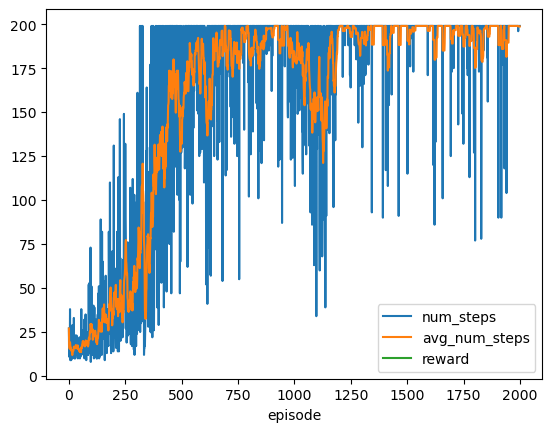

In [11]:
draw_plot(num_steps,avg_num_steps,[],'num_steps','avg_num_steps', 'reward','episode')

#### 测试

In [12]:
agent.net

PolicyNet(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (loss): CrossEntropyLoss()
)

In [13]:
def test(agent,env,episodes=10,max_step=500,render=False):
    rewards = []
    steps = []
    for episode in range(episodes):
        env.render() if render else None
        episode_reward = 0
        state = env.reset()
        for step in range(max_step):
            next_state,reward,done,_ = env.step(agent.get_action(state))
            episode_reward += reward
            if done:
                rewards.append(episode_reward)
                steps.append(step+1)
                print('Episode: {}, Steps: {}, R:{}'.format(episode, step+1,episode_reward))
                break
            state = next_state
    return rewards,steps
            

In [14]:
rewards,steps = test(agent,env)

Episode: 0, Steps: 200, R:200.0
Episode: 1, Steps: 200, R:200.0
Episode: 2, Steps: 200, R:200.0
Episode: 3, Steps: 200, R:200.0
Episode: 4, Steps: 200, R:200.0
Episode: 5, Steps: 200, R:200.0
Episode: 6, Steps: 200, R:200.0
Episode: 7, Steps: 200, R:200.0
Episode: 8, Steps: 200, R:200.0
Episode: 9, Steps: 200, R:200.0


In [15]:
test(agent,env,1,render=True)
env.close()

Episode: 0, Steps: 200, R:200.0


### 习题

**2. 一个具体的轨迹 s1,a1,s2,a2 出现的概率取决于什么？**

环境模型的状态转移概率 $p(s_{t+1}|s_t,a_t)$ 和智能体模型的动作选择概率 $p_\theta(a_t|s_t)$

**3. 最大化期望奖励时 应该使用什么方法**

梯度上升法

**4. 理解策略梯度公式**

![](./img/pg.png)

如果在 st 时刻执行动作 at 使得最后的回报为正，就加大 at 的概率，反之则减小。

**5. 梯度提升计算的方法**

深度学习 学习器

**6. 优化技巧**

添加基线 分配合适分数

**7. 蒙特卡洛强化学习 和 时序差分强化学习的区别**

蒙特卡洛需要取得一条完整的轨迹再进行学习

时序差分法不需要完整轨迹，只需要一个状态和下一个状态

**REINFORCE 算法的计算过程**

- 确定策略模型
- 采样轨迹
- 优化参数

---

## 近端策略优化

> 9/15

近端策略优化（proximal policy optimization，PPO）

**同策略训练方法：** 与环境交互的智能体和学习的智能体是相同的，如策略梯度、sarsa

**异策略训练方法：** 学习的智能体和环境交互的智能体是不同的，如 q-learning

策略梯度是同策略的算法，算法中需要：

- 智能体
- 策略
- 演员

演员的作用是与环境交互获得采样数据

**问题：**

由于是同策略算法，使用待学习的模型来与环境交互，那么每次更新完参数后都会得到一个新的模型，原有的采样数据不能使用了，这样就非常花费时间

**解决：**

变成异策略的：设计使得 $\theta$ 能够 使用演员 $\theta '$ 交互采样到的数据来训练

这样： $\theta '$ 只需要采样一次就可以让 $\theta $ 多次训练

### 重要性采样

**背景：**
- 函数 $f(x)$
- 需要计算从分布 $p$ 采样数据，代入函数 $f(x)$ 
- 但是不能直接从 分布 $p$ 采样
- 只能从另一个分布 $q$ 采样

计算期望就是积分求平均，因此：

$\int f(x)p(x)dx = \int f(x) \frac{p(x)}{q(x)} q(x)dx = \int \frac{p(x)}{q(x)} f(x)q(x)dx$

即：

![](./img/20.png)

从 $q$ 采样出来的数据，都需要乘以 **重要性权重** $\frac{p(x)}{q(x)}$

$q$ 可以是任意分布，只要在 $q=0$ 时 $p \neq 0$。 但在实现上，二者差距不能太大

PPO 实现了对两个分布差距太大的避免

### 近端策略优化